# sp500data.csv contains the data of s&p500
# Part 1: Cleaning Data

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from matplotlib import pyplot

%matplotlib inline

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y%m%d')
pd.to_datetime('20120103', format='%Y%m%d', errors='ignore')

sp500data = pd.read_csv("sp500data.csv", parse_dates=['date'], index_col='date',date_parser=dateparse)
sp500data.head()

,signal,spy_close_price
date,,
2012-01-03,3.107767,127.495
2012-01-04,3.107282,127.700
2012-01-05,3.099757,128.040
2012-01-06,3.134223,127.710
2012-01-09,3.135922,128.020


# no missing value found

In [2]:
sp500data.isnull().sum()

signal             0
spy_close_price    0
dtype: int64

# add a new column for difference of previous spy_close_price

In [3]:
def cal_change():
    global sp500data
    sp500data['change1d'] = sp500data['spy_close_price']-sp500data['spy_close_price'].shift(1)
    sp500data['change5d'] = sp500data['spy_close_price']-sp500data['spy_close_price'].shift(5)
    sp500data['change10d'] = sp500data['spy_close_price']-sp500data['spy_close_price'].shift(10)
    sp500data['change30d'] = sp500data['spy_close_price']-sp500data['spy_close_price'].shift(30)
    sp500data['signal1d'] = sp500data['signal']-sp500data['signal'].shift(1)
    
cal_change()
sp500data.head()

,signal,spy_close_price,change1d,change5d,change10d,change30d,signal1d
date,,,,,,,
2012-01-03,3.107767,127.495,NaN,NaN,NaN,NaN,NaN
2012-01-04,3.107282,127.700,0.205,NaN,NaN,NaN,-0.000485
2012-01-05,3.099757,128.040,0.340,NaN,NaN,NaN,-0.007524
2012-01-06,3.134223,127.710,-0.330,NaN,NaN,NaN,0.034466
2012-01-09,3.135922,128.020,0.310,NaN,NaN,NaN,0.001699


# missing values are created, dropped

In [4]:
sp500data.isnull().sum()

signal              0
spy_close_price     0
change1d            1
change5d            5
change10d          10
change30d          30
signal1d            1
dtype: int64

## there are outliners in signal and spy_close_price

## signal outliners

In [5]:
sp500data[np.abs(sp500data.signal-sp500data.signal.mean())>=(sp500data.signal.mean()/2)]

,signal,spy_close_price,change1d,change5d,change10d,change30d,signal1d
date,,,,,,,
2013-03-26,-3.802670,156.1900,1.2400,1.5800,0.5100,4.4200,-7.593689
2013-11-05,429.514563,176.2700,-0.5600,-0.9000,0.8600,6.7400,425.210680
2013-11-06,432.961165,177.1700,0.9000,0.8800,2.6000,8.1300,3.446602
2014-04-14,0.004560,182.9401,1.4301,-1.3999,-4.0699,-2.0399,-4.535245
2014-04-15,0.454976,184.2000,1.2599,-0.9000,-4.0500,-3.3800,0.450415
2014-04-16,0.455898,186.1250,1.9250,-0.9650,-2.7550,-1.6250,0.000922


## spy_close_price outliners

In [6]:
sp500data[np.abs(sp500data.spy_close_price-sp500data.spy_close_price.mean())>=(sp500data.spy_close_price.mean()/2)]

,signal,spy_close_price,change1d,change5d,change10d,change30d,signal1d
date,,,,,,,
2013-09-12,4.193204,618.95,449.55,452.990,454.39,450.24,-0.007063
2013-09-13,4.143689,619.33,0.38,453.290,453.27,448.67,-0.049515
2013-09-16,4.124515,710.31,90.98,542.676,543.69,539.36,-0.019175



## Use moving averages to correct outliners
## note: need to recalucate MA after each correction

In [7]:
def cal_signalMA():
    sp500data['signalMA']=sp500data.signal.rolling(10,min_periods=1,win_type='blackman').mean()
def cal_spy_close_priceMA():
    sp500data['spy_close_priceMA']=sp500data.spy_close_price.rolling(10,min_periods=1,win_type='blackman').mean()

In [8]:
cal_signalMA()
cal_spy_close_priceMA()

In [9]:
signal_outl_index=sp500data[np.abs(sp500data.signal-sp500data.signal.mean())>=(sp500data.signal.mean()/2)].index
spy_outl_index=sp500data[np.abs(sp500data.spy_close_price-sp500data.spy_close_price.mean())>=(sp500data.spy_close_price.mean()/2)].index

In [10]:
for index in signal_outl_index:
    sp500data.loc[index]['signal']=sp500data.loc[index]['signalMA']
    cal_signalMA()

In [11]:
cal_change()
sp500data.loc[signal_outl_index]

,signal,spy_close_price,change1d,change5d,change10d,change30d,signal1d,signalMA,spy_close_priceMA
date,,,,,,,,,
2013-03-26,3.766179,156.1900,1.2400,1.5800,0.5100,4.4200,-0.024841,3.766179,155.083865
2013-11-05,4.282516,176.2700,-0.5600,-0.9000,0.8600,6.7400,-0.021368,4.282516,176.381352
2013-11-06,4.282540,177.1700,0.9000,0.8800,2.6000,8.1300,0.000024,4.282540,176.325440
2014-04-14,4.488363,182.9401,1.4301,-1.3999,-4.0699,-2.0399,-0.051443,4.488363,185.567841
2014-04-15,4.496415,184.2000,1.2599,-0.9000,-4.0500,-3.3800,0.008052,4.496415,185.012030
2014-04-16,4.507888,186.1250,1.9250,-0.9650,-2.7550,-1.6250,0.011473,4.507888,184.319078


In [12]:
for index in spy_outl_index:
    sp500data.loc[index]['spy_close_price']=sp500data.loc[index]['spy_close_priceMA']
    cal_spy_close_priceMA()

In [13]:
cal_change()
sp500data=sp500data.dropna()
sp500data.loc[spy_outl_index]

,signal,spy_close_price,change1d,change5d,change10d,change30d,signal1d,signalMA,spy_close_priceMA
date,,,,,,,,,
2013-09-12,4.193204,166.370766,-3.029234,0.410766,1.810766,-2.339234,-0.007063,4.027892,166.370766
2013-09-13,4.143689,167.091205,0.720438,1.051205,1.031205,-3.568795,-0.049515,4.070309,167.091205
2013-09-16,4.124515,167.740534,0.649329,0.106534,1.120534,-3.209466,-0.019175,4.117971,167.740534



# Part 2: baseline test

### predict spy_close_price by signal x bias


2012-02-15 00:00:00 - Error: 1.55102
2012-02-16 00:00:00 - Error: 0.12189
2012-02-17 00:00:00 - Error: 0.67615
2012-02-21 00:00:00 - Error: 0.13846
2012-02-22 00:00:00 - Error: 0.59788
2012-02-23 00:00:00 - Error: 0.22838
2012-02-24 00:00:00 - Error: 0.32750
2012-02-27 00:00:00 - Error: 0.44031
2012-02-28 00:00:00 - Error: 0.13087
2012-02-29 00:00:00 - Error: 0.00895
2012-03-01 00:00:00 - Error: 1.27972
2012-03-02 00:00:00 - Error: 1.91940
2012-03-05 00:00:00 - Error: 2.29534
2012-03-06 00:00:00 - Error: 1.98964
2012-03-07 00:00:00 - Error: 1.57848
2012-03-08 00:00:00 - Error: 0.23846
2012-03-09 00:00:00 - Error: 2.18502
2012-03-12 00:00:00 - Error: 2.02335
2012-03-13 00:00:00 - Error: 0.34958
2012-03-14 00:00:00 - Error: 0.08250
2012-03-15 00:00:00 - Error: 0.17871
2012-03-16 00:00:00 - Error: 0.16781
2012-03-19 00:00:00 - Error: 0.94731
2012-03-20 00:00:00 - Error: 1.54509
2012-03-21 00:00:00 - Error: 0.86608
2012-03-22 00:00:00 - Error: 2.09963
2012-03-23 00:00:00 - Error: 1.21059
2

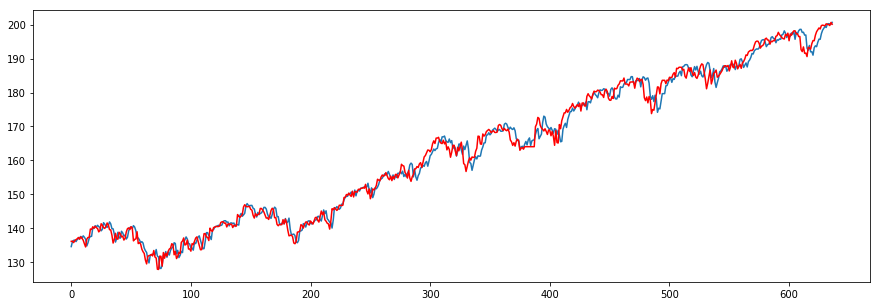

In [14]:
def baseline_error_test(sp500data):
    y_true_list=[]
    y_pred_list=[]
    for day in range(len(sp500data)):
        bias = sp500data['spy_close_price'].mean() / sp500data['signal'].mean()
        y_true = sp500data.iloc[:,1].values[day]
        y_true_list.append(y_true)
        y_pred =sp500data.iloc[:,0].values[day] * bias
        y_pred_list.append(y_pred)
        print('%s - Error: %.5f' % (sp500data.index[day], abs(y_true-y_pred)))
    test_score = mean_squared_error(y_true_list, y_pred_list)
    print('Test MSE: %.3f' % test_score)
    pyplot.figure(figsize=(15,5))
    pyplot.plot(y_true_list)
    pyplot.plot(y_pred_list, color='red')
    pyplot.show()

baseline_error_test(sp500data)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000019DF2D4EA20>], dtype=object)

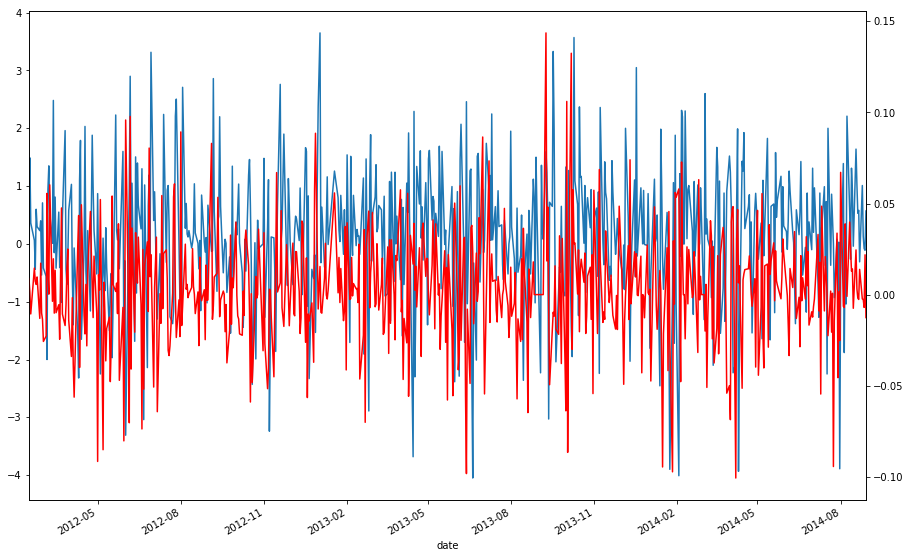

In [15]:
sp500data.change1d.plot(subplots=True,figsize=(15,10))
sp500data.signal1d.plot(subplots=True,figsize=(15,10),secondary_y=True, style='r')

## by observation, signal seems to be a predication of spy_close_price before ~3days

In [16]:
sp500data["sigs1"]=sp500data["signal"].shift(1)
sp500data["sigs2"]=sp500data["signal"].shift(2)
sp500data["sigs3"]=sp500data["signal"].shift(3)
sp500data["sigs4"]=sp500data["signal"].shift(4)
sp500data["sigs5"]=sp500data["signal"].shift(5)
sp500data["sigs6"]=sp500data["signal"].shift(6)
sp500data["sigs7"]=sp500data["signal"].shift(7)
sp500data=sp500data.dropna()

## try 1-5 day shifts
### 1 day shift:

Test MSE: 3.871


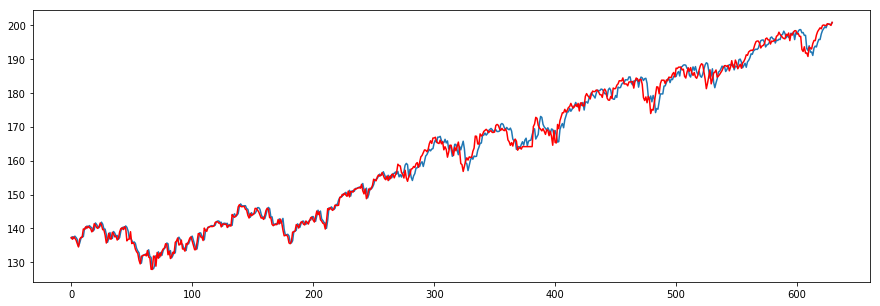

Test MSE: 2.671


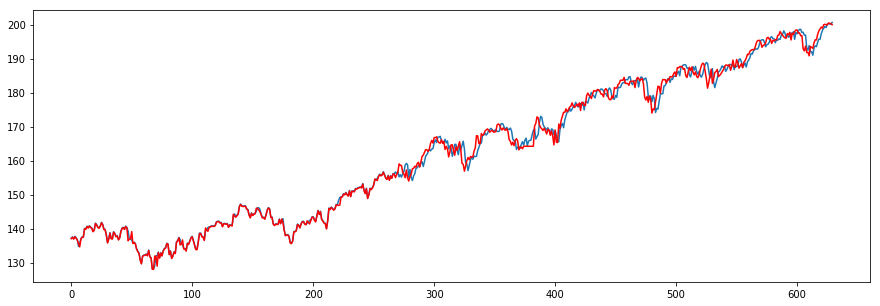

Test MSE: 2.403


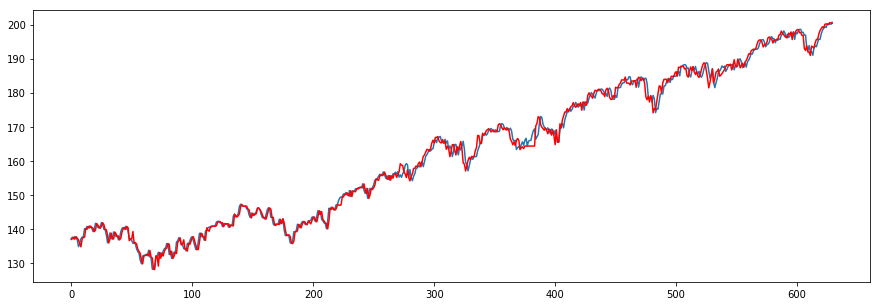

Test MSE: 2.266


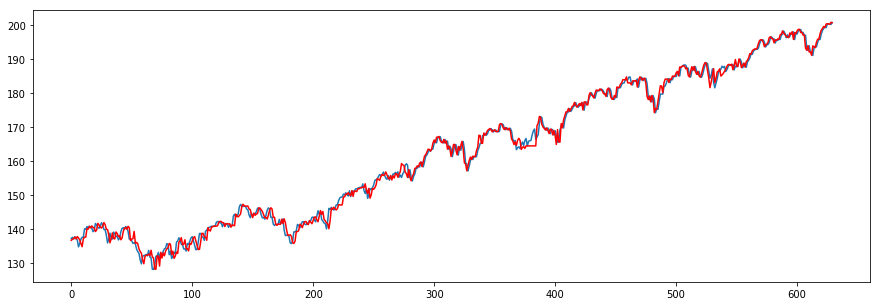

Test MSE: 2.204


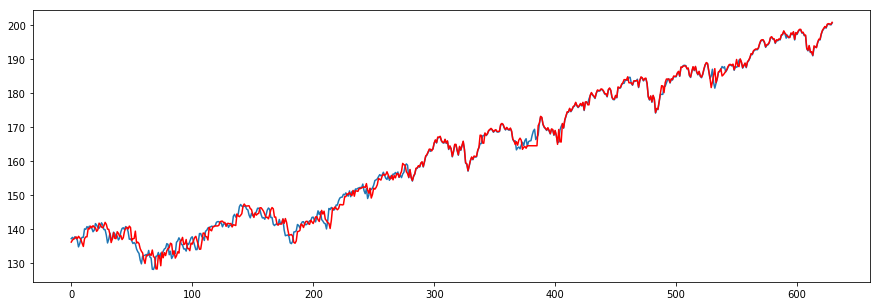

Test MSE: 3.295


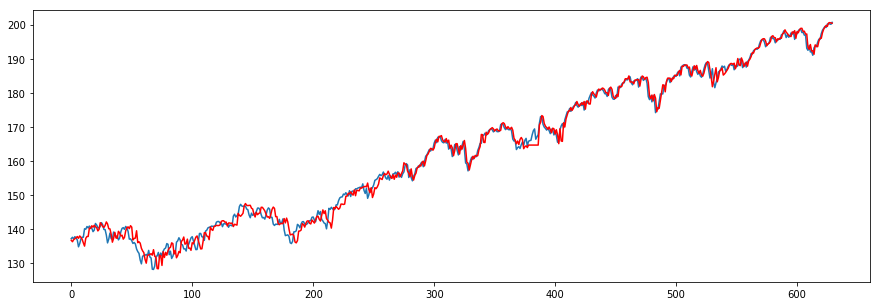

Test MSE: 4.275


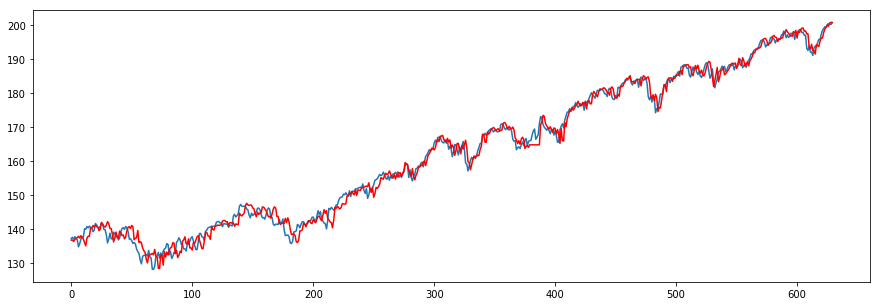

In [17]:
def baseline_error_test_col(sp500data,sig_col):
    y_true_list=[]
    y_pred_list=[]
    for day in range(len(sp500data)):
        bias = sp500data['spy_close_price'].mean() / sp500data[sig_col].mean()
        y_true = sp500data.iloc[:,1].values[day]
        y_true_list.append(y_true)
        y_pred =sp500data[sig_col].values[day] * bias
        y_pred_list.append(y_pred)
    test_score = mean_squared_error(y_true_list, y_pred_list)
    print('Test MSE: %.3f' % test_score)

    pyplot.figure(figsize=(15,5))
    pyplot.plot(y_true_list)
    pyplot.plot(y_pred_list, color='red')
    pyplot.show()

baseline_error_test_col(sp500data,'sigs1')
baseline_error_test_col(sp500data,'sigs2')
baseline_error_test_col(sp500data,'sigs3')
baseline_error_test_col(sp500data,'sigs4')
baseline_error_test_col(sp500data,'sigs5')
baseline_error_test_col(sp500data,'sigs6')
baseline_error_test_col(sp500data,'sigs7')

# a shift of 5 days shows the lowest error

# Part 3:
## try to beat this "signal" with autoregression

## predicting next 7days

Lag: 19
Coefficients: [ 0.02725573  0.97659702 -0.02547874  0.02912841 -0.0695513   0.03406047
  0.10040379 -0.08133587  0.06334204 -0.03491053  0.0357269  -0.0736412
  0.02210974 -0.03791199  0.0054964   0.02081394  0.0243531   0.04363159
 -0.038795    0.00662807]
#0 predicted=199.071457, expected=199.500000
#1 predicted=199.233687, expected=199.190000
#2 predicted=199.060824, expected=200.200000
#3 predicted=199.229333, expected=200.330000
#4 predicted=199.348225, expected=200.250000
#5 predicted=199.285195, expected=200.140000
#6 predicted=199.301474, expected=200.710000
Test MSE: 0.889


C:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


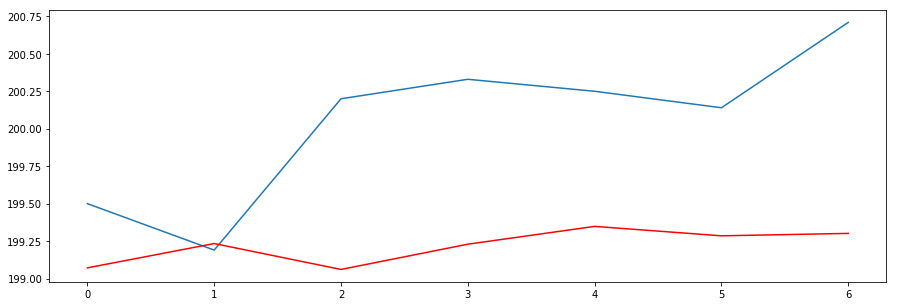

In [18]:
from statsmodels.tsa.ar_model import AR
from matplotlib import pyplot
sp500data_test=sp500data.tail(7)
sp500data_train =sp500data[:-7]
train = sp500data_train.as_matrix(['spy_close_price'])
test = sp500data_test.as_matrix(['spy_close_price'])

model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+7-1, dynamic=False)
for i in range(len(predictions)):
    print('#%i predicted=%f, expected=%f' % (i, predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot results
pyplot.figure(figsize=(15,5))
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

## predicting next 50days

Lag: 19
Coefficients: [-0.08904848  0.98833761 -0.05002652  0.03589295 -0.0738162   0.03517275
  0.1245201  -0.10043871  0.06561575 -0.01349339  0.01854219 -0.07258953
  0.03181688 -0.0448999   0.00800029  0.00301269  0.04099416  0.03451545
 -0.04953426  0.01980633]
#0 predicted=196.374737, expected=195.940000
#1 predicted=196.479652, expected=195.880000
#2 predicted=196.318663, expected=194.700000
#3 predicted=196.262506, expected=195.580000
#4 predicted=196.394849, expected=195.440000
#5 predicted=196.596483, expected=195.820000
#6 predicted=196.860962, expected=195.720000
#7 predicted=197.194070, expected=197.030000
#8 predicted=197.404795, expected=197.230000
#9 predicted=197.505416, expected=198.200000
#10 predicted=197.532881, expected=197.510000
#11 predicted=197.525771, expected=196.240000
#12 predicted=197.610053, expected=197.120000
#13 predicted=197.716941, expected=196.340000
#14 predicted=197.904387, expected=196.610000
#15 predicted=198.133392, expected=197.600000
#16 pre

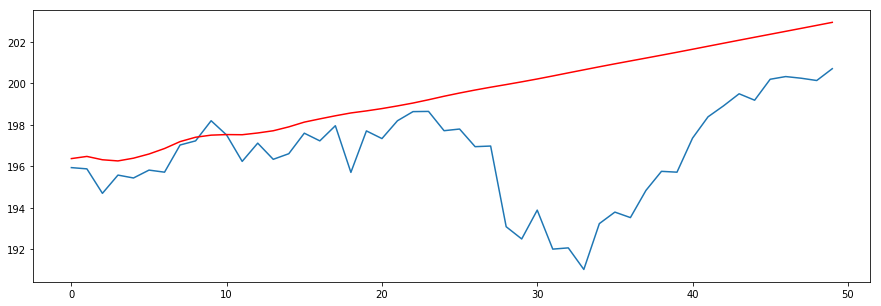

In [19]:
from statsmodels.tsa.ar_model import AR
from matplotlib import pyplot
sp500data_test=sp500data.tail(50)
sp500data_train =sp500data[:-50]
train = sp500data_train.as_matrix(['spy_close_price'])
test = sp500data_test.as_matrix(['spy_close_price'])

model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+50-1, dynamic=False)
for i in range(len(predictions)):
    print('#%i predicted=%f, expected=%f' % (i, predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot results
pyplot.figure(figsize=(15,5))
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

## predicting next 100days

Lag: 18
Coefficients: [ 0.04226673  0.98603152 -0.02951514  0.0169368  -0.07766674  0.02660636
  0.16596273 -0.12614636  0.07537716 -0.02661734  0.00759863 -0.05615302
  0.02808078 -0.0444637  -0.02178604  0.03903405  0.03209815  0.03400709
 -0.02888602]
#0 predicted=185.461910, expected=187.090000
#1 predicted=186.138729, expected=183.155000
#2 predicted=186.711905, expected=181.510000
#3 predicted=186.801362, expected=182.940100
#4 predicted=186.701821, expected=184.200000
#5 predicted=186.732674, expected=186.125000
#6 predicted=186.513380, expected=186.390000
#7 predicted=186.360195, expected=187.040000
#8 predicted=186.404560, expected=187.890000
#9 predicted=186.623618, expected=187.450000
#10 predicted=186.947575, expected=187.830000
#11 predicted=187.431585, expected=186.290000
#12 predicted=187.723425, expected=186.875000
#13 predicted=187.769933, expected=187.750000
#14 predicted=187.672645, expected=188.310000
#15 predicted=187.577352, expected=188.325000
#16 predicted=187.6

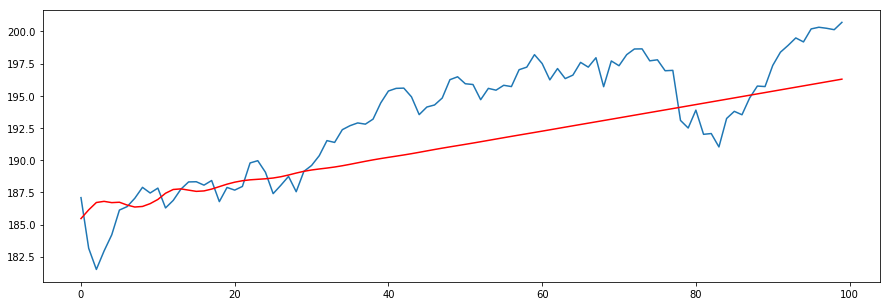

In [20]:
from statsmodels.tsa.ar_model import AR
from matplotlib import pyplot
sp500data_test=sp500data.tail(100)
sp500data_train =sp500data[:-100]
train = sp500data_train.as_matrix(['spy_close_price'])
test = sp500data_test.as_matrix(['spy_close_price'])

model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+100-1, dynamic=False)
for i in range(len(predictions)):
    print('#%i predicted=%f, expected=%f' % (i, predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot results
pyplot.figure(figsize=(15,5))
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

## predicting next 300days

Lag: 16
Coefficients: [ 0.51277554  0.95833224  0.0150843  -0.00829759 -0.07877612  0.00220056
  0.10412018 -0.01931527  0.09827671 -0.05691728  0.06035796 -0.09201088
  0.04393803 -0.02750393 -0.02526841  0.01625177  0.00647376]
#0 predicted=159.134716, expected=160.140000
#1 predicted=159.802333, expected=161.080000
#2 predicted=160.015180, expected=160.420000
#3 predicted=160.219568, expected=161.360000
#4 predicted=159.756514, expected=161.210000
#5 predicted=159.389251, expected=161.280000
#6 predicted=158.908882, expected=163.020000
#7 predicted=158.937043, expected=163.945000
#8 predicted=158.749880, expected=165.130000
#9 predicted=159.114012, expected=165.192000
#10 predicted=159.316439, expected=167.440000
#11 predicted=159.531249, expected=167.510000
#12 predicted=159.605434, expected=168.155000
#13 predicted=159.585073, expected=167.525000
#14 predicted=159.445115, expected=167.950100
#15 predicted=159.390828, expected=168.870000
#16 predicted=159.313461, expected=169.17000

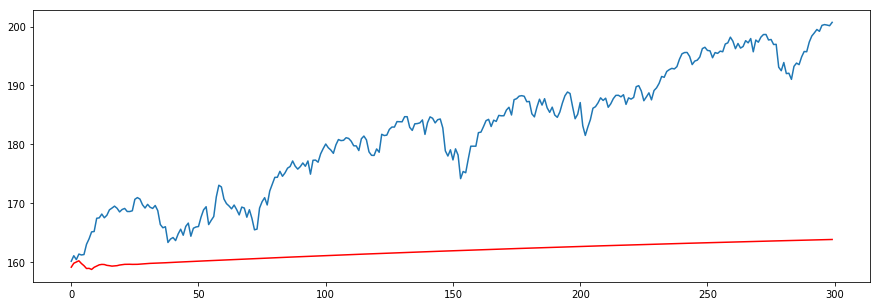

In [21]:
from statsmodels.tsa.ar_model import AR
from matplotlib import pyplot
sp500data_test=sp500data.tail(300)
sp500data_train =sp500data[:-300]
train = sp500data_train.as_matrix(['spy_close_price'])
test = sp500data_test.as_matrix(['spy_close_price'])

model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+300-1, dynamic=False)
for i in range(len(predictions)):
    print('#%i predicted=%f, expected=%f' % (i, predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot results
pyplot.figure(figsize=(15,5))
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

## Auto Regression maybe usable in mid-short term predictions

## try to beat this "signal" with linear regression
## Note that spy_close_price is shift ahead by 1 since we want to predict the next day

#0 predicted=159.769618, expected=197.709900
#1 predicted=159.741312, expected=197.340000
#2 predicted=160.571830, expected=198.200000
#3 predicted=162.174078, expected=198.640000
#4 predicted=163.268481, expected=198.650000
#5 predicted=161.381083, expected=197.720000
#6 predicted=161.016397, expected=197.800000
#7 predicted=159.265677, expected=196.950000
#8 predicted=156.803320, expected=196.980000
#9 predicted=151.639274, expected=193.090000
#10 predicted=152.180611, expected=192.500000
#11 predicted=152.983121, expected=193.890000
#12 predicted=152.192844, expected=192.010000
#13 predicted=151.122695, expected=192.070000
#14 predicted=151.162776, expected=191.030000
#15 predicted=153.248903, expected=193.240000
#16 predicted=154.201822, expected=193.795000
#17 predicted=152.838373, expected=193.530000
#18 predicted=155.339130, expected=194.840000
#19 predicted=155.210405, expected=195.760000
#20 predicted=156.183987, expected=195.720000
#21 predicted=160.278348, expected=197.36000

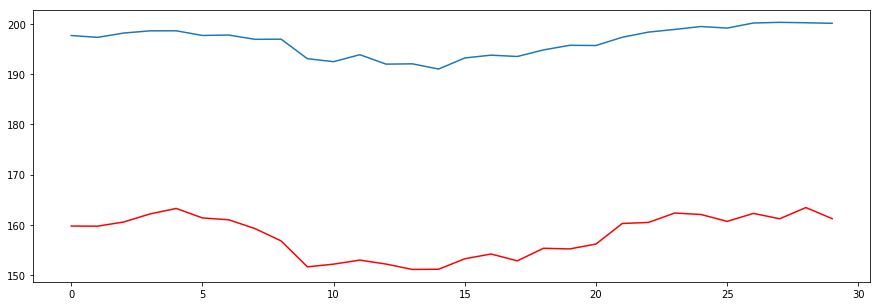

In [22]:
from sklearn import linear_model
from matplotlib import pyplot
sp500data_new = sp500data.drop(['signal','sigs1','sigs2','sigs3','sigs4','sigs5','sigs6','sigs7','signalMA','signal1d','spy_close_priceMA'], axis=1)
sp500data_new.spy_close_price=sp500data_new.spy_close_price.shift(1)
sp500data_new=sp500data_new.dropna()

sp500data_test=sp500data_new.tail(30)
sp500data_test_y=sp500data_test[['spy_close_price']]
sp500data_test_x=sp500data_test.drop(['spy_close_price'], axis=1)
sp500data_train =sp500data_new[:-30]
sp500data_train_y=sp500data_train[['spy_close_price']]
sp500data_train_x=sp500data_train.drop(['spy_close_price'], axis=1)

model = linear_model.LinearRegression(normalize =True)
model_fit = model.fit(sp500data_train_x,sp500data_train_y)

pred_y=model_fit.predict(sp500data_test_x)
for i in range(len(pred_y)):
    print('#%i predicted=%f, expected=%f' % (i, pred_y[i], sp500data_test_y.values[i]))
error = mean_squared_error(sp500data_test_y.values, pred_y)
print('Test MSE: %.3f' % error)
# plot results
pyplot.figure(figsize=(15,5))
pyplot.plot(sp500data_test_y.values)
pyplot.plot(pred_y, color='red')
pyplot.show()

## with a bias

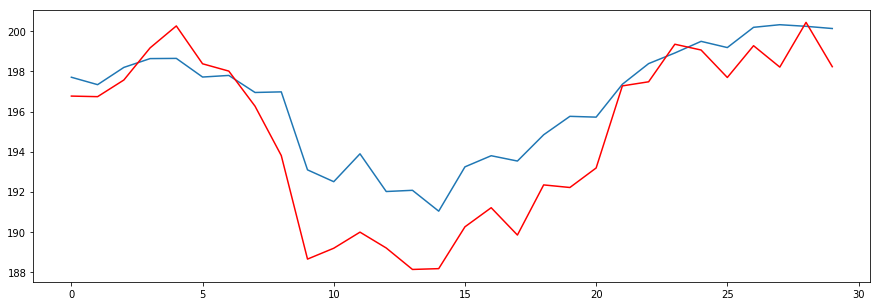

In [23]:
pyplot.figure(figsize=(15,5))
pyplot.plot(sp500data_test_y.values)
pyplot.plot(pred_y+37, color='red')
pyplot.show()

##  This model have some predicting power

# Part 4: A different aproach with more collected data
## Predict SP500 with Asia Market data using linear regression

In [24]:
KOSPI = pd.read_csv("KOSPI Historical Data.csv",parse_dates=["Date"],index_col = ["Date"])
KOSPI=KOSPI.drop(['Price','Open','High','Low','Vol.'],axis=1)
KOSPI=KOSPI.rename(columns={'Change %':'KOSPI'})
KOSPI['KOSPI'] = KOSPI['KOSPI'].str.rstrip('%').astype('float') / 100.0

HangSeng = pd.read_csv("Hang Seng Historical Data.csv",parse_dates=["Date"],index_col = ["Date"])
HangSeng=HangSeng.drop(['Price','Open','High','Low','Vol.'],axis=1)
HangSeng=HangSeng.rename(columns={'Change %':'HangSeng'})
HangSeng['HangSeng'] = HangSeng['HangSeng'].str.rstrip('%').astype('float') / 100.0
HangSeng.head()

Shanghai = pd.read_csv("Shanghai Composite Historical Data.csv",parse_dates=["Date"],index_col = ["Date"])
Shanghai=Shanghai.drop(['Price','Open','High','Low','Vol.'],axis=1)
Shanghai=Shanghai.rename(columns={'Change %':'Shanghai'})
Shanghai['Shanghai'] = Shanghai['Shanghai'].str.rstrip('%').astype('float') / 100.0
Shanghai.head()

Nikkei = pd.read_csv("Nikkei 225 Historical Data.csv",parse_dates=["Date"],index_col = ["Date"])
Nikkei=Nikkei.drop(['Price','Open','High','Low','Vol.'],axis=1)
Nikkei=Nikkei.rename(columns={'Change %':'Nikkei'})
Nikkei['Nikkei'] = Nikkei['Nikkei'].str.rstrip('%').astype('float') / 100.0
Nikkei.head()

SP = pd.read_csv("S&P 500 Historical Data.csv",parse_dates=["Date"],index_col = ["Date"])
SP=SP.drop(['Price','Open','High','Low','Vol.'],axis=1)
SP=SP.rename(columns={'Change %':'SP'})
SP['SP'] = SP['SP'].str.rstrip('%').astype('float') / 100.0
SP.head()

,SP
Date,
2018-04-18,0.0008
2018-04-17,0.0107
2018-04-16,0.0081
2018-04-13,-0.0029
2018-04-12,0.0083


## predict % change

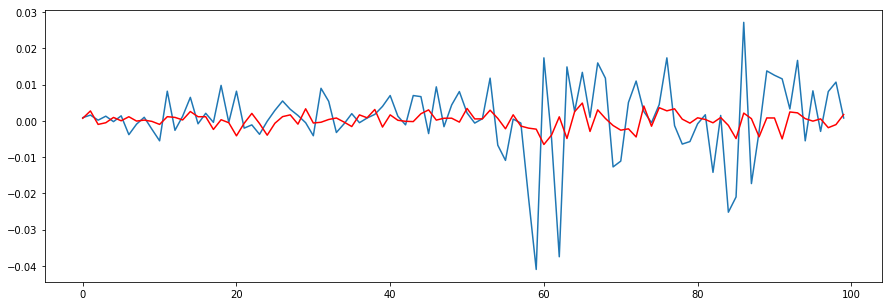

In [25]:
composite= KOSPI.join(HangSeng,how = 'outer')
composite=composite.join(Shanghai,how = 'outer')
composite=composite.join(Nikkei,how = 'outer')
composite=composite.join(SP,how = 'outer')
composite=composite.dropna()
train=composite.iloc[:-100]
train_x=train.drop(['SP'],axis=1)
train_y=train[['SP']]
test=composite.iloc[-100:]
test_x=test.drop(['SP'],axis=1)
test_y=test[['SP']]

from sklearn.linear_model import LinearRegression
clf = LinearRegression(normalize=True)
clf.fit(train_x,train_y) 
pred_y=clf.predict(test_x)
pyplot.figure(figsize=(15,5))
pyplot.plot(test_y['SP'].tolist())
pyplot.plot(pred_y, color='red')
pyplot.show()


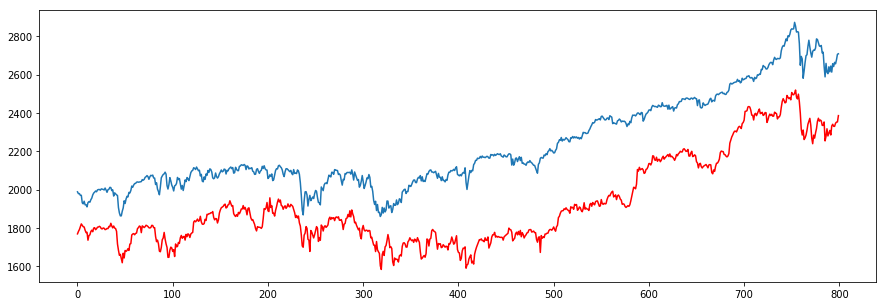

In [26]:
KOSPI = pd.read_csv("KOSPI Historical Data.csv",parse_dates=["Date"],index_col = ["Date"])
KOSPI=KOSPI.drop(['Change %','Open','High','Low','Vol.'],axis=1)
KOSPI=KOSPI.rename(columns={'Price':'KOSPI'})
KOSPI['KOSPI'] = KOSPI['KOSPI'].str.replace(',','').astype('float')

HangSeng = pd.read_csv("Hang Seng Historical Data.csv",parse_dates=["Date"],index_col = ["Date"])
HangSeng=HangSeng.drop(['Change %','Open','High','Low','Vol.'],axis=1)
HangSeng=HangSeng.rename(columns={'Price':'HangSeng'})
HangSeng['HangSeng'] = HangSeng['HangSeng'].str.replace(',','').astype('float')
HangSeng.head()

Shanghai = pd.read_csv("Shanghai Composite Historical Data.csv",parse_dates=["Date"],index_col = ["Date"])
Shanghai=Shanghai.drop(['Change %','Open','High','Low','Vol.'],axis=1)
Shanghai=Shanghai.rename(columns={'Price':'Shanghai'})
Shanghai['Shanghai'] = Shanghai['Shanghai'].str.replace(',','').astype('float')
Shanghai.head()

Nikkei = pd.read_csv("Nikkei 225 Historical Data.csv",parse_dates=["Date"],index_col = ["Date"])
Nikkei=Nikkei.drop(['Change %','Open','High','Low','Vol.'],axis=1)
Nikkei=Nikkei.rename(columns={'Price':'Nikkei'})
Nikkei['Nikkei'] = Nikkei['Nikkei'].str.replace(',','').astype('float')
Nikkei.head()

SP = pd.read_csv("S&P 500 Historical Data.csv",parse_dates=["Date"],index_col = ["Date"])
SP=SP.drop(['Change %','Open','High','Low','Vol.'],axis=1)
SP=SP.rename(columns={'Price':'SP'})
SP['SP'] = SP['SP'].str.rstrip(',').str.replace(',','').astype('float')
SP.head()

composite= KOSPI.join(HangSeng,how = 'outer')
composite=composite.join(Shanghai,how = 'outer')
composite=composite.join(Nikkei,how = 'outer')
composite=composite.join(SP,how = 'outer')
composite=composite.dropna()
train=composite.iloc[:-800]
train_x=train.drop(['SP'],axis=1)
train_y=train[['SP']]
test=composite.iloc[-800:]
test_x=test.drop(['SP'],axis=1)
test_y=test[['SP']]

from sklearn.linear_model import LinearRegression
clf = LinearRegression(normalize=True,fit_intercept=True)
clf.fit(train_x,train_y) 
pred_y=clf.predict(test_x)
pyplot.figure(figsize=(15,5))
pyplot.plot(test_y['SP'].tolist())
pyplot.plot(pred_y, color='red')
pyplot.show()


## Conclusion: Asia stock prices cant not predict the price of SP500.
## However, it seems that SP500 can predict the next date price/direction of Asia markets